In [1]:
from keras.layers import Dense, Input
from keras.models import Model

Using TensorFlow backend.


In [2]:
encoding_dim = 32

input_img = Input(shape = (784, ))

encoded = Dense(encoding_dim, activation = 'relu')(input_img)

decoded = Dense(784, activation = 'sigmoid')(encoded)

In [3]:
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

In [4]:
encoded_input = Input(shape = (encoding_dim, ))

decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [7]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [9]:
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))

In [10]:
x_train.shape

(60000, 784)

In [11]:
x_test.shape

(10000, 784)

In [12]:
autoencoder.fit(x_train, x_train,
               epochs = 50,
               batch_size = 256,
               shuffle = True,
               validation_data = (x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 16s 266us/step - loss: 0.3626 - val_loss: 0.2716
Epoch 2/50
60000/60000 [==============================] - 15s 258us/step - loss: 0.2646 - val_loss: 0.2540
Epoch 3/50
60000/60000 [==============================] - 16s 259us/step - loss: 0.2440 - val_loss: 0.2317
Epoch 4/50
60000/60000 [==============================] - 17s 283us/step - loss: 0.2235 - val_loss: 0.2131
Epoch 5/50
60000/60000 [==============================] - 15s 253us/step - loss: 0.2074 - val_loss: 0.1994
Epoch 6/50
60000/60000 [==============================] - 16s 263us/step - loss: 0.1960 - val_loss: 0.1897
Epoch 7/50
60000/60000 [==============================] - 16s 266us/step - loss: 0.1873 - val_loss: 0.1819
Epoch 8/50
60000/60000 [==============================] - 16s 259us/step - loss: 0.1801 - val_loss: 0.1753
Epoch 9/50
60000/60000 [==============================] - 15s 257us/step - loss: 0.1740 - val_

In [13]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

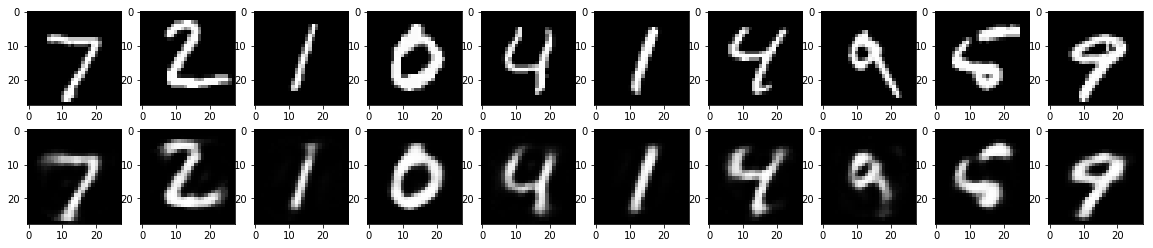

In [15]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    
    ax = plt.subplot(2, n, i+1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
plt.show()